# Log-normal Distribution

[Wiki](https://en.wikipedia.org/wiki/Log-normal_distribution) outlines the following properties.

The probability dense function(PDF) is

$\begin{align*}\quad\quad
f(x) = \frac{1}{\sqrt{2\pi}\sigma x}e^{-\frac{1}{2}\big(\frac{lnx-\mu}{\sigma}\big)^2}
\end{align*}$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

The **standard** log-normal distribution has $\mu = 0$ and $\sigma = 1 $.

The cumulative distribution function is

$\begin{align*}\quad\quad
\frac{1}{2}\Big[1 + erf\big(\frac{lnx - \mu}{\sqrt{2}\sigma}\big)\Big]
\end{align*}$

where the error function $erf(x)$ is defined as

$\begin{align*}\quad\quad
erf(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt
\end{align*}$

Moments:
- 1st moment/mean is $e^{\mu+\frac{1}{2}\sigma^2}$
- 2nd moment/variance is $e^{2\mu + 2\sigma^2}$
- 3rd moment/skewness is $\left(e^{\sigma^2} + 2\right)\sqrt{e^{\sigma^2} - 1}$
- 4th moment/kurtosis is $3 + \left(e^{\sigma^2} - 1\right)\left(e^{3\sigma^2} + 3e^{2\sigma^2} + 6e^{\sigma^2} + 6\right)$

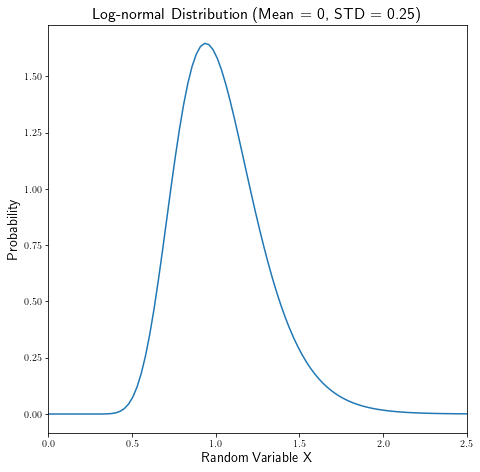

In [38]:
%reload_ext autoreload
%autoreload 2

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(0, 2.5)
x = np.linspace(0, 2.5, 100)

mean, std = 0, 0.25
normal_dist = stats.lognorm(s=[std], loc=mean)
plt.title(f'Log-normal Distribution (Mean = {mean}, STD = {std})', fontsize='16')

plt.plot(x, normal_dist.pdf(x))
plt.show()

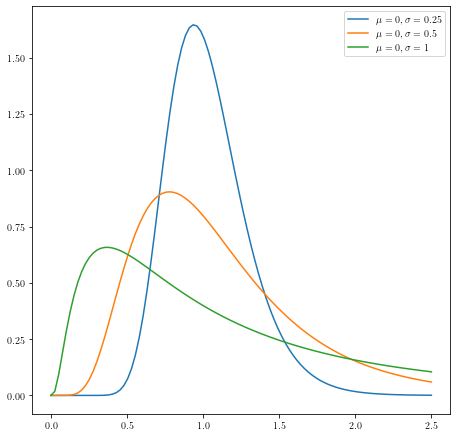

In [41]:
plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.lognorm(s=[0.25], loc=0).pdf(x), label=r'$\mu = 0, \sigma = 0.25$')
plt.plot(x, stats.lognorm(s=[0.5], loc=0).pdf(x), label=r'$\mu = 0, \sigma = 0.5$')
plt.plot(x, stats.lognorm(s=[1], loc=0).pdf(x), label=r'$\mu = 0, \sigma = 1$')

plt.legend()
plt.show()

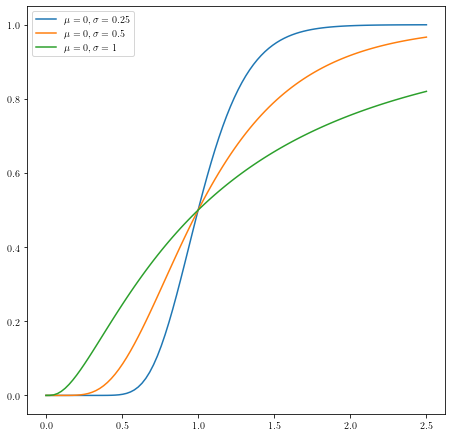

In [46]:
plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.lognorm(s=[0.25], loc=0).cdf(x), label=r'$\mu = 0, \sigma = 0.25$')
plt.plot(x, stats.lognorm(s=[0.5], loc=0).cdf(x), label=r'$\mu = 0, \sigma = 0.5$')
plt.plot(x, stats.lognorm(s=[1], loc=0).cdf(x), label=r'$\mu = 0, \sigma = 1$')

plt.legend()
plt.show()

In [59]:
from sympy import *
x, u, a = symbols('x, u, a', real=True)
# print(a.assumptions0)
pdf = exp(-(log(x)-u)**2 / 2 / a**2) / sqrt(2 * pi) / (a * x)
# all probabilities should sum up to 1
# https://stackoverflow.com/questions/40452918/integrating-log-normal-pdf-in-sympy
integrate(pdf, (x, -oo, oo))
# integrate(x * pdf, (x, -oo, oo))  first moment

sqrt(2)*exp(-u**2/(2*a**2))*Integral(exp(-log(x)**2/(2*a**2))*exp(u*log(x)/a**2)/x, (x, -oo, oo))/(2*sqrt(pi)*a)

In [56]:
from sympy.stats import LogNormal, density
from sympy import Symbol, pprint

z = Symbol("z")
u = Symbol("u", positive = True)
a = Symbol("a", positive = True)

# Using sympy.stats.LogNormal() method
X = LogNormal("x", u, a)
gfg = density(X)(z)

pprint(gfg)
integrate(gfg, (z, -oo, oo))

                  2 
    -(-u + log(z))  
    ────────────────
             2      
          2⋅a       
√2⋅ℯ                
────────────────────
      2⋅√π⋅a⋅z      


sqrt(2)*exp(-u**2/(2*a**2))*Integral(exp(-log(z)**2/(2*a**2))*exp(u*log(z)/a**2)/z, (z, -oo, oo))/(2*sqrt(pi)*a)